## Simulating Stack Overflow interaction network

In [1]:
# Imports
from model_6 import *

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### Execute the model

In [3]:
#Initialization

# Start with 200 users and add 200 for 10 timesteps
# All probabilities are drawn from a normal distribution
n = 250

stack_overflow = system(n, 'tags.txt')

In [4]:
# Run for 20 timesteps
stack_overflow.run(20)

#### Data collection

##### Number of upvotes given per user

In [10]:
# Collect the total number of questions and answers that a user has upvoted
# This is the number of nodes that users would have in a bipartite network

upvotes = []
for user in stack_overflow.users:
    upvotes.append(user.n_questions_upvoted + user.n_answers_upvoted)

##### Reputation of users

In [11]:
reputation = []
for user in stack_overflow.users:
    reputation.append(user.reputation)

#### Data analysis

##### Number of upvotes given per user

In [12]:
# Create bins
bin_size_upvotes = int(np.round(np.max(upvotes) / len(upvotes))) + 1

x_upvotes = np.array([(i+1) * bin_size_upvotes for i in range(len(upvotes) + 1)])

upvotes_bin = np.zeros((len(upvotes) + 1))
for value in upvotes:
    upvotes_bin[(value // bin_size_upvotes)] += 1

# Probability distribution for number of upvotes
upvotes_bin_pdf = upvotes_bin / np.sum(upvotes_bin)

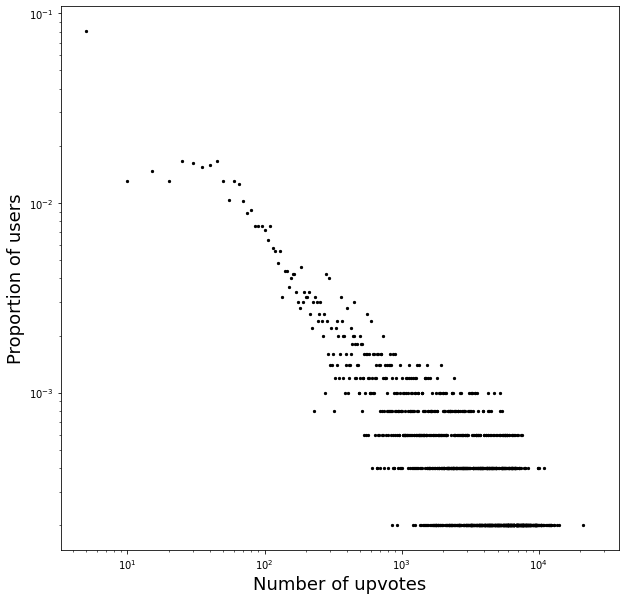

In [13]:
# Plot
plt.figure(figsize = (10,10))
plt.scatter(x_upvotes, upvotes_bin_pdf, color = 'black', s = 5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of upvotes', fontsize = 18)
plt.ylabel('Proportion of users', fontsize = 18)
plt.savefig('default_upvotes.pdf')
plt.show()

In [14]:
# Linear regression

# Calculate the log of the data
x_upvotes_log = []
upvotes_pdf_log = []

for ind, value in enumerate(upvotes_bin_pdf):
    if value != 0:
        x_upvotes_log.append(np.log10(x_upvotes[ind]))
        upvotes_pdf_log.append(np.log10(value))

# Linear model
lin_model = LinearRegression().fit(np.array(x_upvotes_log).reshape((-1, 1)), upvotes_pdf_log)
upvotes_bin_pred = lin_model.predict(np.array(x_upvotes_log).reshape((-1, 1))) 

# R squared value
r_sq = lin_model.score(np.array(x_upvotes_log).reshape((-1, 1)), upvotes_pdf_log)
print(r_sq)


0.7113255155296112


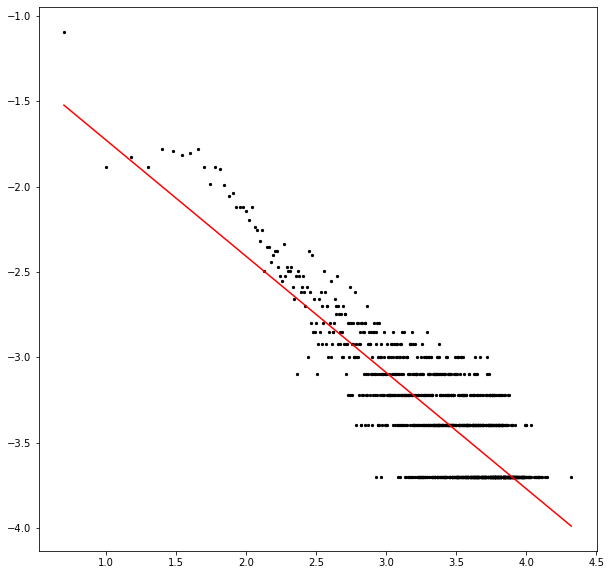

In [15]:
# Plot regression
plt.figure(figsize = (10,10))
plt.scatter(x_upvotes_log, upvotes_pdf_log, color = 'black', s = 5)
plt.plot(x_upvotes_log, upvotes_bin_pred, color = 'red')
plt.show()

In [16]:
lin_model.coef_

array([-0.68034729])

##### Reputation of users

In [17]:
# Create bins
bin_size_rep = int(np.round(np.max(reputation) / len(reputation))) + 1

x_rep = np.array([(i+1) * bin_size_rep for i in range(len(reputation) + 1)])

rep_bin = np.zeros((len(upvotes) + 1))
for value in reputation:
    rep_bin[(value // bin_size_rep)] += 1

# Probability distribution for number of upvotes
rep_bin_pdf = rep_bin / np.sum(rep_bin)

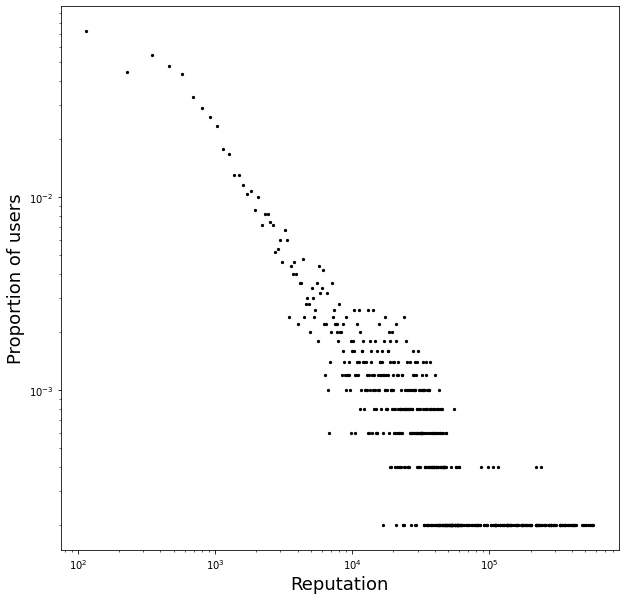

In [18]:
# Plot
plt.figure(figsize = (10,10))
plt.scatter(x_rep, rep_bin_pdf, color = 'black', s = 5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Reputation', fontsize = 18)
plt.ylabel('Proportion of users', fontsize = 18)
plt.savefig('default_reputation.pdf')
plt.show()

In [21]:
# Linear regression

# Calculate the log of the data
x_rep_log = []
rep_pdf_log = []

for ind, value in enumerate(rep_bin_pdf):
    if value != 0:
        x_rep_log.append(np.log10(x_rep[ind]))
        rep_pdf_log.append(np.log10(value))

# Linear model
lin_model = LinearRegression().fit(np.array(x_rep_log).reshape((-1, 1)), rep_pdf_log)
rep_pred = lin_model.predict(np.array(x_rep_log).reshape((-1, 1))) 

# R squared value
r_sq = lin_model.score(np.array(x_rep_log).reshape((-1, 1)), rep_pdf_log)

print(lin_model.coef_)

0.7733500797150992
[-0.75305954]


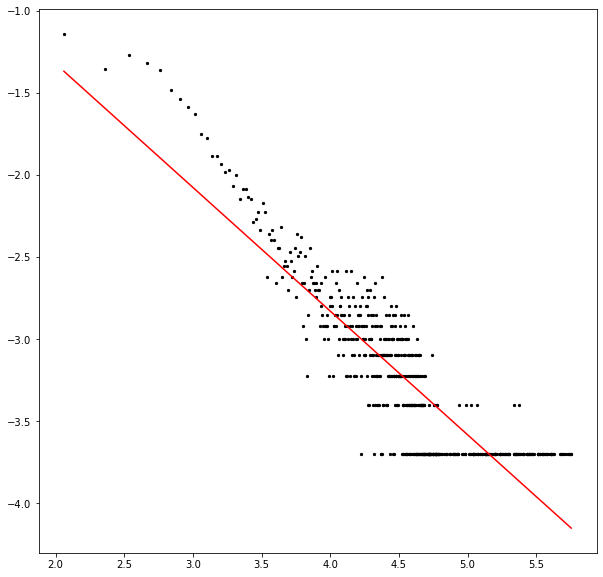

In [22]:
# Plot regression
plt.figure(figsize = (10,10))
plt.scatter(x_rep_log, rep_pdf_log, color = 'black', s = 5)
plt.plot(x_rep_log, rep_pred, color = 'red')
plt.show()

In [23]:
# Percentage of the total reputation obtained by the top 10% of users
print('The top 10%% of users has %s %% of the total reputation' % np.round(np.sum(np.sort(reputation)[-len(reputation)//10:])/np.sum(reputation) * 100, 2))

The top 10% of users has 64.72 % of the total reputation


##### Analysis of some of high reputation and low reputation users

In [19]:
# 10 lowest users
users = []
indices = np.argwhere(reputation == np.min(reputation))
#for rep in np.sort(reputation)[:10]:
    #users.append(stack_overflow.users[reputation.index(rep)])
for index in indices:
    users.append(stack_overflow.users[int(index)])

print('ID \t p_ask \t \t \t p_answer \t  \t p_interact \t \t p_active \n')
for user in users:
    print('Begin parameters')
    print('%s \t %s \t %s \t %s \t %s \t %s' %(user.id, user.p_ask_begin, user.p_answer_begin, user.p_interact_begin, user.p_active_begin, user.reputation))
    print('Final parameters')
    print('%s \t %s \t %s \t %s \t %s \t %s \n' %(user.id, user.p_ask, user.p_answer, user.p_interact, user.p_active, user.reputation))

ID 	 p_ask 	 	 	 p_answer 	  	 p_interact 	 	 p_active 

Begin parameters
2562 	 0.09975689512962022 	 0.07309572192096614 	 0.3451649556255566 	 0.6678848358684139 	 1
Final parameters
2562 	 0.09975689512962022 	 0.07309572192096614 	 0.3451649556255566 	 0.6678848358684139 	 1 

Begin parameters
2941 	 0.13119225225761116 	 0.2560573223715936 	 0.37707756095553163 	 0.48579313138482466 	 1
Final parameters
2941 	 0.13119225225761116 	 0.2560573223715936 	 0.37707756095553163 	 0.48579313138482466 	 1 

Begin parameters
3083 	 0.4040005180127638 	 0.32397977168739683 	 0.5225463164685373 	 0.15036834275605004 	 1
Final parameters
3083 	 0.4040005180127638 	 0.32397977168739683 	 0.5225463164685373 	 0.15036834275605004 	 1 

Begin parameters
3100 	 0.2175879468025551 	 0.05871939505566509 	 0.3231127984467178 	 0.4885021232092896 	 1
Final parameters
3100 	 0.2175879468025551 	 0.05871939505566509 	 0.3231127984467178 	 0.4885021232092896 	 1 

Begin parameters
3219 	 0.1406063863535

In [20]:
# 10 highest users
users = []
for rep in np.sort(reputation)[-10:]:
    users.append(stack_overflow.users[reputation.index(rep)])

print('ID \t p_ask \t \t \t p_answer \t  \t p_interact \t \t p_active \n')
for user in users:
    print('Begin parameters')
    print('%s \t %s \t %s \t %s \t %s \t %s' %(user.id, user.p_ask_begin, user.p_answer_begin, user.p_interact_begin, user.p_active_begin, user.reputation))
    print('Final parameters')
    print('%s \t %s \t %s \t %s \t %s \t %s \n' %(user.id, user.p_ask, user.p_answer, user.p_interact, user.p_active, user.tag))

ID 	 p_ask 	 	 	 p_answer 	  	 p_interact 	 	 p_active 

Begin parameters
665 	 0.37595061320286355 	 0.2775663468342513 	 0.42392778147258314 	 0.9355336441842802 	 426956
Final parameters
665 	 0.118493765833425 	 0.9999999999999998 	 0.42392778147258314 	 0.9999999999999998 	 1 

Begin parameters
1222 	 0.6112436967538 	 0.3688380893399996 	 0.7940879347874287 	 0.9715389129460883 	 427711
Final parameters
1222 	 0.12483091688571889 	 0.9999999999999998 	 0.7940879347874287 	 0.9999999999999998 	 1 

Begin parameters
552 	 0.5272988952846938 	 0.5611777935714838 	 0.46511213313778466 	 0.3434353196410678 	 465806
Final parameters
552 	 0.11000444215381051 	 0.9999999999999998 	 0.46511213313778466 	 0.9999999999999998 	 0 

Begin parameters
547 	 0.40966282925047337 	 0.41986520754989287 	 0.4508336634506196 	 0.3470894028020583 	 470161
Final parameters
547 	 0.13407959282643944 	 0.9999999999999998 	 0.4508336634506196 	 0.9999999999999998 	 0 

Begin parameters
370 	 0.3128494181

In [44]:
len(stack_overflow.questions)

18710